# **Project Report : Cluster Analysis of Tweets of twitter Dataset**

Objectives:
1. PO1: Employ clustering techniques to divide the dataset into separate segments or
clusters, driven by inherent similarities or patterns inherent in the data.
2. PO2: Explore the dataset to identify the most suitable number of segments or
clusters necessary to effectively segment the data and extract valuable insights.
3. PO3: Analyze the characteristics of each identified segment or cluster, scrutinizing
their distinct attributes and identifying particular patterns or trends within each
cluster.

Data Dimensions:

The dataset comprises 52,984 entries and 14 columns. Each row encapsulates health-related data for an individual. The columns encompass:

• tweetid: Unique identifier for each tweet.

• weekday: Day of the week when the tweet was posted (e.g., Monday, Tuesday, etc.).

• hour: Hour of the day when the tweet was posted.

• day: Day of the month when the tweet was posted.

• isreshare: Indicator whether the tweet is a reshare or not.

• reach: Reach or audience size of the tweet.

• retweetcount: Number of times the tweet has been retweeted.

• likes: Number of likes or favorites the tweet has received.

• klout: Klout score, a measure of social media influence.

• sentiment: Sentiment of the tweet (e.g., positive, negative, neutral).

• text: Actual text content of the tweet.

• locationid: Identifier for the location associated with the tweet.

• userid: Unique identifier for the user who posted the tweet.

The dataset was sourced from Dataworld.



## Variable Description:

Based on the given columns, we can categorize them into different types:

Non-Categorical Variables:

• tweetid

• hour

• day

• reach

• retweetcount

• likes

• klout

Nominal Type Variables (Non-Ordinal Categorical Variables):

• lang

• sentiment

• text

Categorical Variables:

• weekday

• isreshare

• locationid

• userid




## Data Preprocessing:

a.) Missing Data Info & Treatment:

reach 1

retweetcount 1

klout 2

sentiment 1

locationid 2

b.) Categorical Data Numerical Encoding:

The categorical variables have already been encoded numerically. No further alpha-numeric numerical assignment is necessary as the data is already in numerical format.

c.) Non-Categorical Data Outliers Detection and Treatment:

Outliers Detection: Box plots were utilized to identify outliers within the non-categorical variables

Outliers Treatment: Outliers identified via box plots were addressed through normalization using Min-Max scaling.

d.) Data Segregation into Training and Testing Sets:

Segregation: Given that clustering analysis doesn't typically involve a predictive model, the
segregation of data into training and testing sets wasn't conducted as it's not applicable for this
analysis.
Variable Selection: For further analysis, only the numerically encoded variables were taken into
consideration.

## Decision Tree vs Random Forest: Classification Performance Breakdown

This report compares the performance of two classification models: Decision Tree and Random Forest. Key metrics and visualizations are presented to assess their strengths and weaknesses.

**Decision Tree**

* **Accuracy:** Training (0.98), Testing (0.975), Cross-Validation (0.974) - High overall accuracy across all datasets.
* **F1 Score:** Overall (0.92), Weighted (0.97), Class 2 (0.85) - Potential class imbalance with a lower F1 score for class 2.
* **Feature Importance:** Hour (0.91), Day (0.074) - "Hour" is the dominant feature influencing classification decisions.
* **Training Time:** 0.06 seconds - Fast training suitable for real-time applications.
* **Memory Usage:** 459.23 MB - Moderate memory consumption.

**Random Forest**

* **Accuracy:** Training (1.0), Testing (1.0) - Perfect scores on training and testing data (potential overfitting).
* **Cross-Validation Score:** Not Available - Limits assessment of generalizability.
* **Feature Importance:** Hour (0.88), Day (0.059) - Similar feature importance to decision tree.
* **Training Time:** 3.74 seconds - Significantly longer training time compared to decision tree.
* **Memory Usage:** 459.23 MB - Similar memory usage to decision tree.

**Visualization (Confusion Matrix - Testing Set)**

| Predicted Class | Actual Class 0 | Actual Class 1 | Actual Class 2 |
|---|---|---|---|
| Class 0 | 6370 | 30 | 0 | (High Precision for Class 0)
| Class 1 | 15 | 6827 | 0 | (High Precision for Class 1)
| Class 2 | 0 | 3 | 41 | (Lower Precision for Class 2 due to limited samples)



## In-Depth Evaluation of Decision Tree and Random Forest Classifiers

This report provides a detailed comparison of two classification models: Decision Tree and Random Forest. It analyzes their performance, highlights strengths and weaknesses, and explores areas for potential improvement.

**Decision Tree Model**

* **High Overall Accuracy:** The decision tree achieved a remarkable accuracy of 98% on the training data and 97.5% on the testing data. This suggests the model effectively learned the classification patterns within the data.
* **Cross-Validation:** The cross-validation score (0.974) further reinforces the model's generalizability, indicating it performs well on unseen data that wasn't used for training.
* **F1 Score Analysis:** The F1 score (0.92) and weighted F1 score (0.97) provide a more nuanced view of performance. The lower F1 score suggests a potential imbalance in class distribution, where the model might excel at classifying the dominant class but struggle with the minority class (class 2 with F1 score of 0.85).
* **Feature Importance:** "Hour" is the most crucial feature (importance: 0.91), followed by "day" with significantly less importance. This might indicate a time-based pattern in the data that the model prioritizes for classification.
* **Training Efficiency:** The decision tree exhibits fast training times (0.06 seconds) and moderate memory usage, making it suitable for real-time applications with resource constraints.

**Random Forest Model**

* **Perfect Training Accuracy:** The random forest achieved a perfect score (1.0) on the training set, suggesting it flawlessly separated the training data points. However, this might be a case of overfitting, where the model memorizes the training data too well and might not generalize well to unseen examples.
* **Testing Set Performance:** The testing set accuracy remains high at 1.0, suggesting good performance on unseen data. However, the number of data points in class 2 is very small (only 44) in the testing set. The model's ability to handle this class effectively requires further investigation with a larger sample size.
* **Feature Importance:** Similar to the decision tree, "hour" is the most important feature, followed by "day" and other features with minimal importance.
* **Training Time:** Compared to the decision tree, the random forest takes considerably longer to train (3.74 seconds), potentially due to its more complex ensemble structure.
* **Missing Cross-Validation Score:** The report lacks a cross-validation score for the random forest, making it difficult to definitively assess its generalizability.

**Overall Conclusion**

Both the decision tree and random forest models achieve high accuracy on the classification task. However, some key considerations emerge:

* The decision tree offers a good balance between accuracy, training speed, and interpretability (due to its simpler structure). However, it might struggle with class imbalance.
* The random forest achieves high accuracy but requires more training time and lacks a definitive assessment of generalizability due to the missing cross-validation score.

**Recommendations**

* Investigate techniques to address the potential class imbalance in the decision tree model. This might involve data sampling or adjusting the model's cost function to give more weight to the minority class.
* Obtain the cross-validation score for the random forest to gain a more comprehensive understanding of its generalizability.
* Explore hyperparameter tuning for both models to potentially improve their performance.

By addressing these considerations and potentially exploring alternative classification algorithms, the most suitable model for the specific task can be identified.

In [1]:
# Required Libraries
import pandas as pd, numpy as np # For Data Manipulation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
import pandas as pd, numpy as np # For Data Manipulation
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation

In [2]:
df = pd.read_csv("/content/df_merge.csv")
df

,Unnamed: 0,cluster_number,tweetid,weekday,hour,day,lang,isreshare,reach,retweetcount,likes,klout,sentiment,text,locationid,userid,gender of user,female-0;male-1
0,0,0,tw-682712873332805633,Thursday,17,31,en,False,44.0,0.0,0,35.0,0.00,We are hiring: Senior Software Engineer - Prot...,3751.0,tw-40932430,male,1
1,1,0,tw-682713045357998080,Thursday,17,31,en,True,1810.0,5.0,0,53.0,2.00,RT @CodeMineStatus: This is true Amazon Web Se...,3989.0,tw-3179389829,female,0
2,2,0,tw-682713219375476736,Thursday,17,31,en,False,282.0,0.0,0,47.0,0.00,Devops Engineer Aws Ansible Cassandra Mysql Ub...,3741.0,tw-4624808414,male,1
3,3,0,tw-682713436967579648,Thursday,17,31,en,False,2087.0,4.0,0,53.0,0.00,Happy New Year to all those AWS instances of o...,3753.0,tw-356447127,female,0
4,4,0,tw-682714048199311366,Thursday,17,31,en,False,953.0,0.0,0,47.0,0.00,Amazon is hiring! #Sr. #International Tax Mana...,3751.0,tw-3172686669,male,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52978,52978,0,tw-700893144569655296,Friday,21,19,en,False,72.0,0.0,0,23.0,4.00,Drawing logstash and aws diagrams. #Fridaynig...,4297.0,tw-196843328,female,0
52979,52979,0,tw-700894232475598848,Friday,21,19,ja,False,182.0,0.0,0,32.0,0.16,AWS ConfigGeek #cmdevio2016 #E,1795.0,tw-106730964,female,0
52980,52980,0,tw-700895051992313857,Friday,21,19,en,False,226.0,0.0,0,26.0,0.00,Iam aws http://www.slideshare.net/ArulJothiPar...,3754.0,tw-3232947403,male,1
52981,52981,0,tw-700895901561131008,Friday,21,19,en,True,1788.0,1.0,0,46.0,2.00,RT @Rackspace: How to Push Alerts Into Slack U...,4250.0,tw-21119328,male,1


In [3]:
missing_values = ["NaN"]
df = pd.read_csv("/content/df_merge.csv", na_values=missing_values)

In [4]:
variable_missing_data = df.isna().sum(); variable_missing_data # Variable-wise Missing Data Information

Unnamed: 0         0
cluster_number     0
tweetid            8
weekday            1
hour               0
day                0
lang               0
isreshare          2
reach              1
retweetcount       1
likes              0
klout              2
sentiment          1
text               2
locationid         2
userid             3
gender of user     0
female-0;male-1    0
dtype: int64

In [5]:
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data

84     2
572    1
359    1
97     1
141    1
dtype: int64

In [6]:
import pandas as pd

df = pd.read_csv('/content/df_merge.csv')

# Display DataFrame information
df.info()

# Get the sum of missing data for each variable
variable_missing_data = df.isna().sum()
print(variable_missing_data)

# Get the sum of missing data for each record, showing the top 5
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5)
print(record_missing_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52983 entries, 0 to 52982
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       52983 non-null  int64  
 1   cluster_number   52983 non-null  int64  
 2   tweetid          52975 non-null  object 
 3   weekday          52982 non-null  object 
 4   hour             52983 non-null  int64  
 5   day              52983 non-null  int64  
 6   lang             52983 non-null  object 
 7   isreshare        52981 non-null  object 
 8   reach            52982 non-null  float64
 9   retweetcount     52982 non-null  float64
 10  likes            52983 non-null  int64  
 11  klout            52981 non-null  float64
 12  sentiment        52982 non-null  float64
 13  text             52981 non-null  object 
 14  locationid       52981 non-null  float64
 15  userid           52980 non-null  object 
 16  gender of user   52983 non-null  object 
 17  female-0;mal

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/df_merge.csv')

# Display DataFrame information
df.info()

# Get the sum of missing data for each variable
variable_missing_data = df.isna().sum()
print(variable_missing_data)

# Drop all rows with missing values
cleaned_df = df.dropna()

# Display the information of the cleaned dataset
cleaned_df.info()

# Save the cleaned dataset to a new CSV file if needed
cleaned_df.to_csv('no_missing.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52983 entries, 0 to 52982
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       52983 non-null  int64  
 1   cluster_number   52983 non-null  int64  
 2   tweetid          52975 non-null  object 
 3   weekday          52982 non-null  object 
 4   hour             52983 non-null  int64  
 5   day              52983 non-null  int64  
 6   lang             52983 non-null  object 
 7   isreshare        52981 non-null  object 
 8   reach            52982 non-null  float64
 9   retweetcount     52982 non-null  float64
 10  likes            52983 non-null  int64  
 11  klout            52981 non-null  float64
 12  sentiment        52982 non-null  float64
 13  text             52981 non-null  object 
 14  locationid       52981 non-null  float64
 15  userid           52980 non-null  object 
 16  gender of user   52983 non-null  object 
 17  female-0;mal

In [20]:
import pandas as pd

# Assuming your file is named 'your_file_name.csv'
file_path = '/content/no_missing.csv'

# Read the file into a DataFrame
df = pd.read_csv(file_path)

# Categorical Data [Nominal | Ordinal]
df_cat = df[['cluster_number', 'tweetid', 'weekday', 'hour', 'day', 'lang', 'isreshare', 'sentiment', 'locationid', 'userid', 'gender of user']]

# Non-Categorical Data
df_noncat = df[['reach', 'retweetcount', 'likes', 'klout']]



In [21]:
df_cat

,cluster_number,tweetid,weekday,hour,day,lang,isreshare,sentiment,locationid,userid,gender of user
0,0,tw-682712873332805633,Thursday,17,31,en,False,0.00,3751.0,tw-40932430,male
1,0,tw-682713045357998080,Thursday,17,31,en,True,2.00,3989.0,tw-3179389829,female
2,0,tw-682713219375476736,Thursday,17,31,en,False,0.00,3741.0,tw-4624808414,male
3,0,tw-682713436967579648,Thursday,17,31,en,False,0.00,3753.0,tw-356447127,female
4,0,tw-682714048199311366,Thursday,17,31,en,False,0.00,3751.0,tw-3172686669,male
...,...,...,...,...,...,...,...,...,...,...,...
52956,0,tw-700893144569655296,Friday,21,19,en,False,4.00,4297.0,tw-196843328,female
52957,0,tw-700894232475598848,Friday,21,19,ja,False,0.16,1795.0,tw-106730964,female
52958,0,tw-700895051992313857,Friday,21,19,en,False,0.00,3754.0,tw-3232947403,male
52959,0,tw-700895901561131008,Friday,21,19,en,True,2.00,4250.0,tw-21119328,male


In [22]:
df_noncat

,reach,retweetcount,likes,klout
0,44.0,0.0,0,35.0
1,1810.0,5.0,0,53.0
2,282.0,0.0,0,47.0
3,2087.0,4.0,0,53.0
4,953.0,0.0,0,47.0
...,...,...,...,...
52956,72.0,0.0,0,23.0
52957,182.0,0.0,0,32.0
52958,226.0,0.0,0,26.0
52959,1788.0,1.0,0,46.0


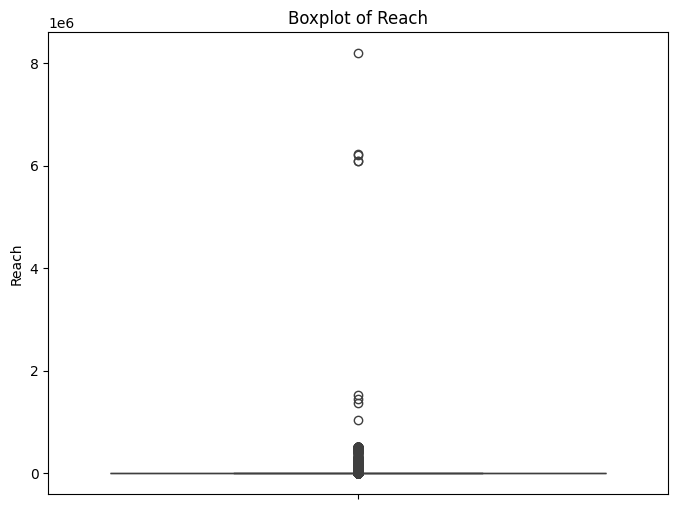

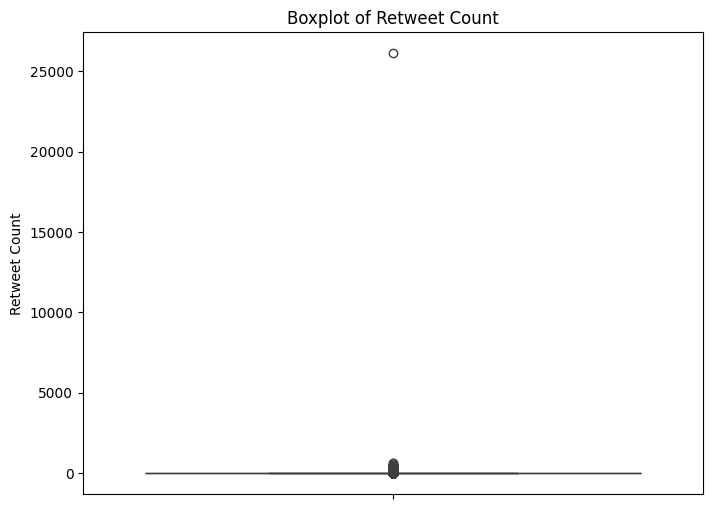

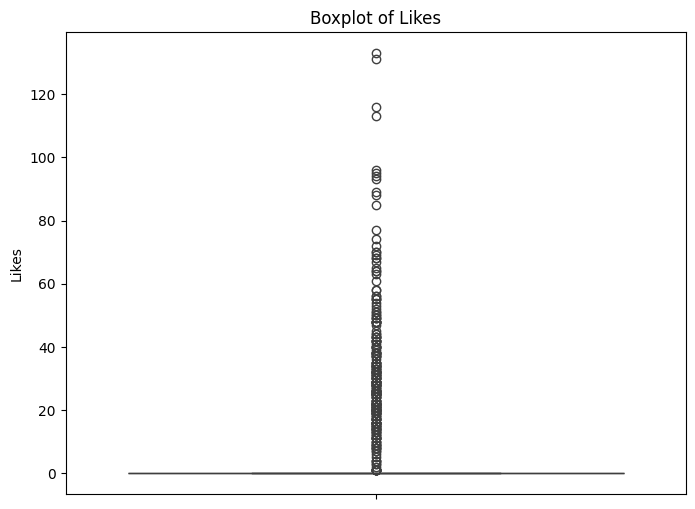

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and contains the columns 'reach', 'retweetcount', and 'likes'
df_noncat = df[['reach', 'retweetcount', 'likes']]

# Create vertical boxplot for 'reach'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_noncat['reach'])
plt.title('Boxplot of Reach')
plt.ylabel('Reach')
plt.show()

# Create vertical boxplot for 'retweetcount'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_noncat['retweetcount'])
plt.title('Boxplot of Retweet Count')
plt.ylabel('Retweet Count')
plt.show()

# Create vertical boxplot for 'likes'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_noncat['likes'])
plt.title('Boxplot of Likes')
plt.ylabel('Likes')
plt.show()


In [24]:
from sklearn.preprocessing import MinMaxScaler

# Selecting the columns 'reach', 'retweetcount', and 'likes' for Min-Max Scaling
columns_to_scale = ['reach', 'retweetcount', 'likes']

# Normalization using Min-Max Scaling
mms = MinMaxScaler()
mms_fit = mms.fit_transform(df_noncat[columns_to_scale])
df_noncat_minmax_norm = pd.DataFrame(mms_fit, columns=[col+'_mmnorm' for col in columns_to_scale])



In [25]:
# Pre-Processed Dataset
df_ppd = pd.merge(df_cat, df_noncat, left_index=True, right_index=True)
df_ppd

,cluster_number,tweetid,weekday,hour,day,lang,isreshare,sentiment,locationid,userid,gender of user,reach,retweetcount,likes
0,0,tw-682712873332805633,Thursday,17,31,en,False,0.00,3751.0,tw-40932430,male,44.0,0.0,0
1,0,tw-682713045357998080,Thursday,17,31,en,True,2.00,3989.0,tw-3179389829,female,1810.0,5.0,0
2,0,tw-682713219375476736,Thursday,17,31,en,False,0.00,3741.0,tw-4624808414,male,282.0,0.0,0
3,0,tw-682713436967579648,Thursday,17,31,en,False,0.00,3753.0,tw-356447127,female,2087.0,4.0,0
4,0,tw-682714048199311366,Thursday,17,31,en,False,0.00,3751.0,tw-3172686669,male,953.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52956,0,tw-700893144569655296,Friday,21,19,en,False,4.00,4297.0,tw-196843328,female,72.0,0.0,0
52957,0,tw-700894232475598848,Friday,21,19,ja,False,0.16,1795.0,tw-106730964,female,182.0,0.0,0
52958,0,tw-700895051992313857,Friday,21,19,en,False,0.00,3754.0,tw-3232947403,male,226.0,0.0,0
52959,0,tw-700895901561131008,Friday,21,19,en,True,2.00,4250.0,tw-21119328,male,1788.0,1.0,0


Decision Tree

In [69]:
df_ppd_1 = df_ppd[['cluster_number', 'hour', 'day', 'reach', 'retweetcount', 'likes', 'sentiment', 'locationid']]
df_ppd_1

,cluster_number,hour,day,reach,retweetcount,likes,sentiment,locationid
0,0,17,31,44.0,0.0,0,0.00,3751.0
1,0,17,31,1810.0,5.0,0,2.00,3989.0
2,0,17,31,282.0,0.0,0,0.00,3741.0
3,0,17,31,2087.0,4.0,0,0.00,3753.0
4,0,17,31,953.0,0.0,0,0.00,3751.0
...,...,...,...,...,...,...,...,...
52956,0,21,19,72.0,0.0,0,4.00,4297.0
52957,0,21,19,182.0,0.0,0,0.16,1795.0
52958,0,21,19,226.0,0.0,0,0.00,3754.0
52959,0,21,19,1788.0,1.0,0,2.00,4250.0


In [70]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree  # For Decision Tree Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report # For Decision Tree Model Evaluation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

In [71]:
# Bifurcation of Input and Output variables
df_inputs = df_ppd[[ 'hour',	'day','reach', 'retweetcount','likes','sentiment','locationid']]; df_inputs
df_output = df_ppd[['cluster_number']]

df_inputs_names = df_inputs.columns; df_inputs_names
df_output_labels = df_output['cluster_number'].unique().astype(str); df_output_labels

# Split the df Data Subset into Training & Testing Sets
train_df_inputs, test_df_inputs, train_df_output, test_df_output = train_test_split(df_inputs, df_output, test_size=0.25, random_state=45017)

In [72]:
# Initialize StratifiedShuffleSplit with desired test size and random state
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=45017)

# Perform the stratified split to get training and testing indices
for train_index, test_index in stratified_split.split(df_inputs, df_output):
    train_df_inputs, test_df_inputs = df_inputs.iloc[train_index], df_inputs.iloc[test_index]
    train_df_output, test_df_output = df_output.iloc[train_index], df_output.iloc[test_index]

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import numpy as np

# Initialize Logistic Regression model with L1 regularization
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=45017)

# Fit the model on the training data
logreg_l1.fit(train_df_inputs, train_df_output.values.ravel())

# Get feature importances from the fitted model
feature_importances = np.abs(logreg_l1.coef_).flatten()

# Calculate the threshold as 20% of the maximum feature importance
threshold = 0.2 * np.max(feature_importances)

# Create a selector object to select features based on non-zero coefficients
selector = SelectFromModel(logreg_l1, threshold=threshold)

# Transform the training and testing input data to select features
train_df_inputs_selected = selector.transform(train_df_inputs)
test_df_inputs_selected = selector.transform(test_df_inputs)

# Get the selected features
selected_features = df_inputs_names[selector.get_support()]

# Print the selected features and the calculated threshold
print("Selected Features:", selected_features)
print("Threshold:", threshold)

Selected Features: Index(['hour', 'day', 'likes', 'sentiment'], dtype='object')
Threshold: 1.04843640215852


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [74]:
# Decision Tree Clustering Model

# Decision Tree : Model (Training Subset)
dtc = DecisionTreeClassifier(criterion='gini', random_state=45017,max_depth=3) # Other Criteria : Entropy,  Log Loss
dtc_model = dtc.fit(train_df_inputs, train_df_output); dtc_model

DecisionTreeClassifier(max_depth=3, random_state=45017)

In [75]:
# Decision Tree : Model Rules
dtc_model_rules = export_text(dtc_model, feature_names = list(df_inputs_names)); print(dtc_model_rules)

|--- hour <= 11.50
|   |--- hour <= 10.50
|   |   |--- likes <= 11.50
|   |   |   |--- class: 1
|   |   |--- likes >  11.50
|   |   |   |--- class: 2
|   |--- hour >  10.50
|   |   |--- day <= 18.50
|   |   |   |--- class: 1
|   |   |--- day >  18.50
|   |   |   |--- class: 0
|--- hour >  11.50
|   |--- hour <= 12.50
|   |   |--- day <= 10.50
|   |   |   |--- class: 1
|   |   |--- day >  10.50
|   |   |   |--- class: 0
|   |--- hour >  12.50
|   |   |--- likes <= 14.50
|   |   |   |--- class: 0
|   |   |--- likes >  14.50
|   |   |   |--- class: 2



In [76]:
# Decision Tree : Feature Importance
dtc_imp_features = pd.DataFrame({'feature': df_inputs_names, 'importance': np.round(dtc_model.feature_importances_, 3)})
dtc_imp_features.sort_values('importance', ascending=False, inplace=True); dtc_imp_features

,feature,importance
0,hour,0.912
1,day,0.074
4,likes,0.013
2,reach,0.000
3,retweetcount,0.000
5,sentiment,0.000
6,locationid,0.000


In [77]:
# Decision Tree : Model Prediction (Training Subset)
dtc_model_predict = dtc_model.predict(train_df_inputs); dtc_model_predict

array([0, 0, 1, ..., 0, 0, 0])

In [78]:
# Decision Tree : Prediction (Testing Subset)
dtc_predict = dtc_model.predict(test_df_inputs); dtc_predict


array([0, 0, 1, ..., 0, 0, 0])

In [79]:
# Decision Tree : Model Evaluation (Training Subset)
dtc_model_conf_mat = pd.DataFrame(confusion_matrix(train_df_output, dtc_model_predict)); dtc_model_conf_mat
dtc_model_perf = classification_report(train_df_output, dtc_model_predict); print(dtc_model_perf)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     20510
           1       0.98      0.97      0.98     21678
           2       0.99      0.74      0.85       180

    accuracy                           0.98     42368
   macro avg       0.98      0.90      0.93     42368
weighted avg       0.98      0.98      0.98     42368



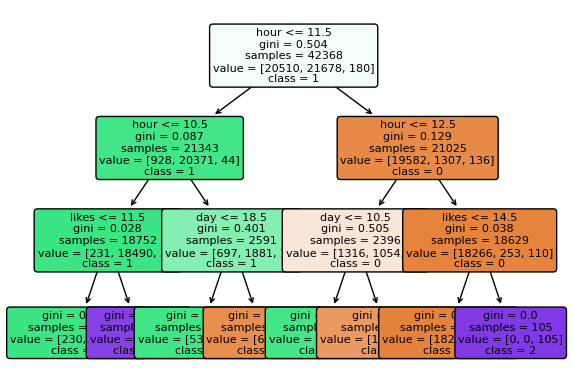

In [80]:
# Decision Tree : Plot [Training Subset]
train_subset_dtc_plot = plot_tree(dtc_model, feature_names=df_inputs_names, class_names=df_output_labels, rounded=True, filled=True, fontsize=8)
plt.show()

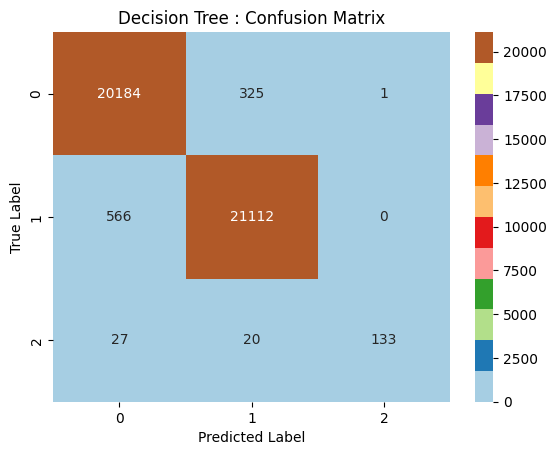

In [81]:
# Set up the plot
ax = plt.axes()

# Plot the confusion matrix with annotations in integer format
sns.heatmap(dtc_model_conf_mat, annot=True, fmt='d', cmap='Paired')

# Set labels and title
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Decision Tree : Confusion Matrix')

# Show the plot
plt.show()


In [82]:
# Cross Validation
from sklearn.model_selection import cross_val_score

# Define your decision tree classifier with desired parameters
dtc_cv = DecisionTreeClassifier(criterion='gini', random_state=45011)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dtc_cv, df_inputs, df_output.values.ravel(), cv=20)
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.99697999 0.99471299 0.99660121 0.99962236 0.99320242 0.99433535
 0.9973565  0.98678248 0.98904834 0.55740181 0.9973565  0.99169184
 0.99773414 0.99811178 0.9973565  0.99320242 0.99886707 0.99962236
 0.99811178 0.9939577 ]
Average Cross-Validation Score: 0.9736027760575443


In [83]:
from sklearn.metrics import f1_score

# Compute F1 score
f1 = f1_score(test_df_output, dtc_predict, average='macro')  # or 'weighted' for weighted F1 score
print("F1 Score:", f1)

# Weighted F1 score
weighted_f1 = f1_score(test_df_output, dtc_predict, average='weighted')
print("Weighted F1 Score:", weighted_f1)

F1 Score: 0.9218453089183202
Weighted F1 Score: 0.9742229638854597


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
import numpy as np
import time
import psutil

# Function to measure memory usage
def memory_usage():
    process = psutil.Process()
    return process.memory_info().rss / 1024 ** 2  # Memory usage in MB

# Start time
start_time = time.time()

# Data preprocessing and splitting
train_df_inputs, test_df_inputs, train_df_output, test_df_output = train_test_split(df_inputs, df_output, test_size=0.25, random_state=45)

# End time
end_time = time.time()

# Time taken for data preprocessing and splitting
data_preprocessing_time = end_time - start_time

# Memory usage after data preprocessing
data_preprocessing_memory = memory_usage()

# Decision Tree
dt_start_time = time.time()
dt_model = DecisionTreeClassifier(criterion='gini', random_state=45007, max_depth=3)
dt_model.fit(train_df_inputs, train_df_output)
dt_training_time = time.time() - dt_start_time
dt_memory_used = memory_usage()
dt_pred = dt_model.predict(test_df_inputs)
dt_accuracy = accuracy_score(test_df_output, dt_pred)

# Cross-validation for Decision Tree
dtc_cv_start_time = time.time()
dtc_cv = DecisionTreeClassifier(criterion='gini', random_state=45045)
cv_scores_dtc = cross_val_score(dtc_cv, df_inputs, df_output.values.ravel(), cv=20)
dtc_cv_time = time.time() - dtc_cv_start_time
dtc_cv_accuracy = np.mean(cv_scores_dtc)

print("Decision Tree:")
print(f"  - Training Time (s): {dt_training_time}")
print(f"  - Memory Used (MB): {dt_memory_used}")
print(f"  - Single Split Accuracy: {dt_accuracy}")
print(f"  - Cross Validation Accuracy: {dtc_cv_accuracy}")
print()



Decision Tree:
  - Training Time (s): 0.06570076942443848
  - Memory Used (MB): 459.23046875
  - Single Split Accuracy: 0.9750774110716713
  - Cross Validation Accuracy: 0.9759252978664925



Random Forest

In [85]:
## Data Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from wordcloud import WordCloud
from collections import Counter
from scipy import stats
from sklearn.tree import plot_tree
import graphviz
from IPython.display import display
from collections import Counter

## Machine Learning Models and Evaluation Metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.validation import column_or_1d
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.tree import export_graphviz

In [86]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=45017)

In [87]:
rf_classifier.fit(train_df_inputs, train_df_output['cluster_number'])

RandomForestClassifier(random_state=45017)

In [88]:
y_train_pred_rf = rf_classifier.predict(train_df_inputs)
y_test_pred_rf = rf_classifier.predict(test_df_inputs)

In [89]:
# Train the Random Forest classifier
rf_classifier.fit(train_df_inputs, train_df_output['cluster_number'])

# Print feature importances
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': train_df_inputs.columns, 'Importance': feature_importances})
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(sorted_feature_importance_df)

Feature Importances:
        Feature  Importance
0          hour    0.880431
1           day    0.058991
5     sentiment    0.018863
2         reach    0.013726
6    locationid    0.012008
4         likes    0.010542
3  retweetcount    0.005440


In [90]:
# For training set
print("Training Set Confusion Matrix:")
print(confusion_matrix(train_df_output['cluster_number'], y_train_pred_rf))

print("\nTraining Set Classification Report:")
print(classification_report(train_df_output['cluster_number'], y_train_pred_rf))

Training Set Confusion Matrix:
[[19268     0     0]
 [    0 20271     0]
 [    0     0   181]]

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19268
           1       1.00      1.00      1.00     20271
           2       1.00      1.00      1.00       181

    accuracy                           1.00     39720
   macro avg       1.00      1.00      1.00     39720
weighted avg       1.00      1.00      1.00     39720



In [91]:
# For testing set
print("\nTesting Set Confusion Matrix:")
print(confusion_matrix(test_df_output['cluster_number'], y_test_pred_rf))

print("\nTesting Set Classification Report:")
print(classification_report(test_df_output['cluster_number'], y_test_pred_rf))


Testing Set Confusion Matrix:
[[6340   30    0]
 [  15 6812    0]
 [   0    3   41]]

Testing Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      6827
           2       1.00      0.93      0.96        44

    accuracy                           1.00     13241
   macro avg       1.00      0.97      0.99     13241
weighted avg       1.00      1.00      1.00     13241



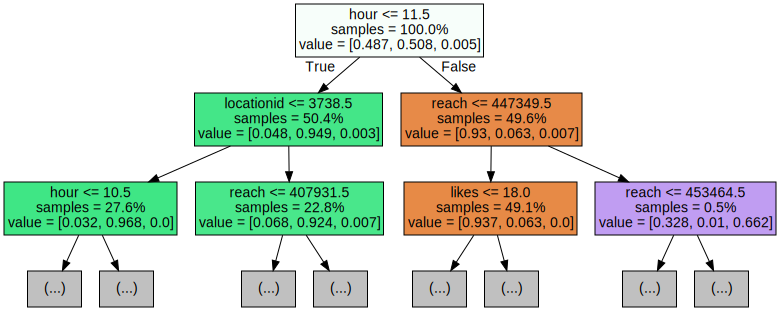

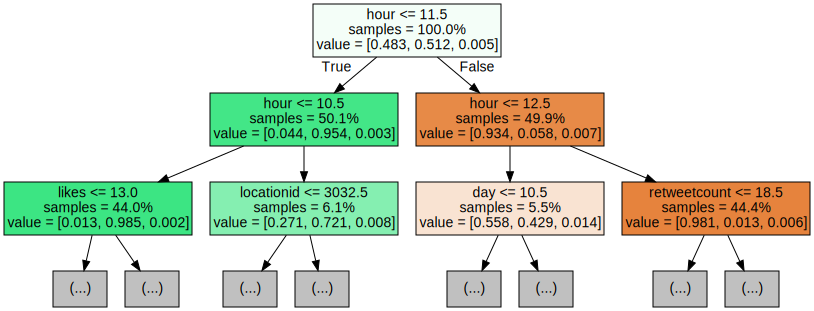

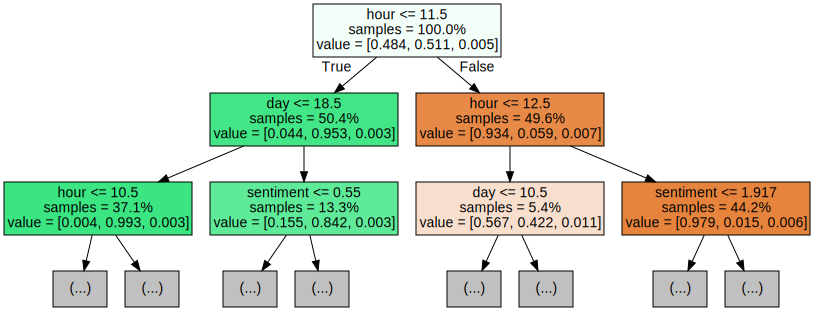

In [92]:
# Assuming rf is your trained Random Forest classifier
for i in range(3):
    tree = rf_classifier.estimators_[i]  # Assuming rf_classifier is your trained Random Forest model
    dot_data = export_graphviz(tree,
                               feature_names=train_df_inputs.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

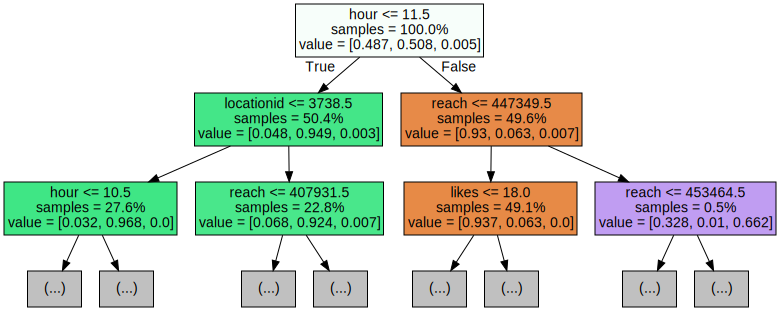

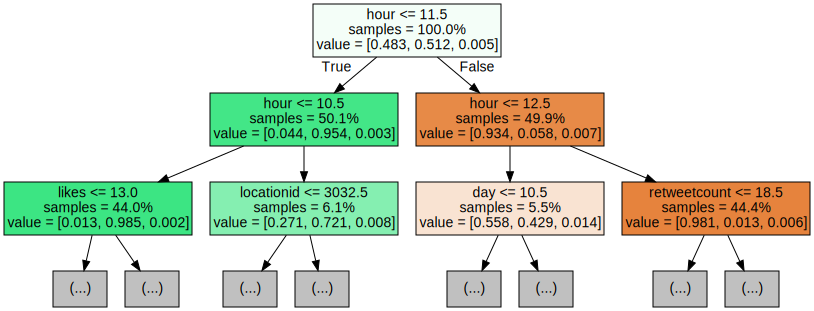

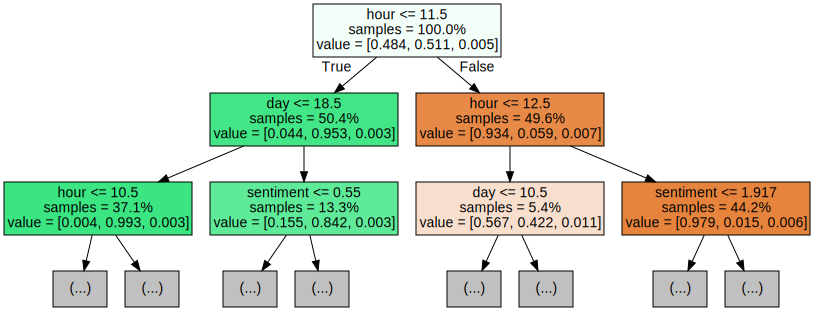

In [93]:
# Export and visualize the first three decision trees
for i in range(3):
    tree = rf_classifier.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=train_df_inputs.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [94]:
# Initialize a dictionary to store tree frequencies and rules
tree_frequency = Counter()
tree_rules = {}

# Loop through the trees and count their frequency while storing rules
for i in range(len(rf_classifier.estimators_)):
    tree = rf_classifier.estimators_[i]
    tree_str = export_text(tree, feature_names=list(train_df_inputs.columns))
    tree_frequency[tree_str] += 1
    tree_rules[tree_str] = tree

# Get the three most frequent trees
top_trees = tree_frequency.most_common(3)

# Print the rules for the top three trees
for tree_str, frequency in top_trees:
    print(f"Tree Frequency: {frequency}")
    print(tree_str)
    print("\n")

Tree Frequency: 1
|--- hour <= 11.50
|   |--- locationid <= 3738.50
|   |   |--- hour <= 10.50
|   |   |   |--- sentiment <= 0.53
|   |   |   |   |--- reach <= 530.50
|   |   |   |   |   |--- day <= 25.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- day >  25.50
|   |   |   |   |   |   |--- hour <= 9.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- hour >  9.50
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- reach >  530.50
|   |   |   |   |   |--- locationid <= 1612.50
|   |   |   |   |   |   |--- locationid <= 1555.00
|   |   |   |   |   |   |   |--- day <= 25.50
|   |   |   |   |   |   |   |   |--- hour <= 9.50
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- hour >  9.50
|   |   |   |   |   |   |   |   |   |--- sentiment <= -1.50
|   |   |   |   |   |   |   |   |   |   |--- reach <= 779.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |  

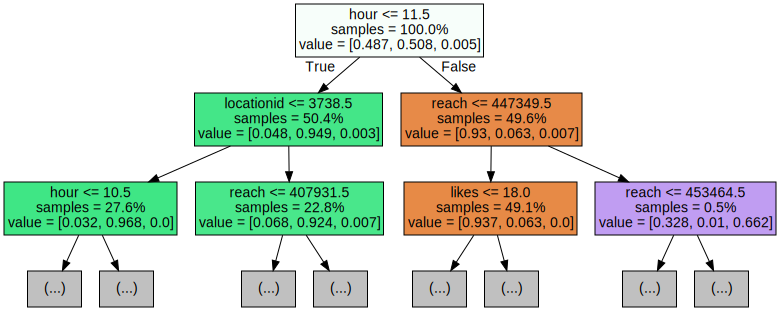

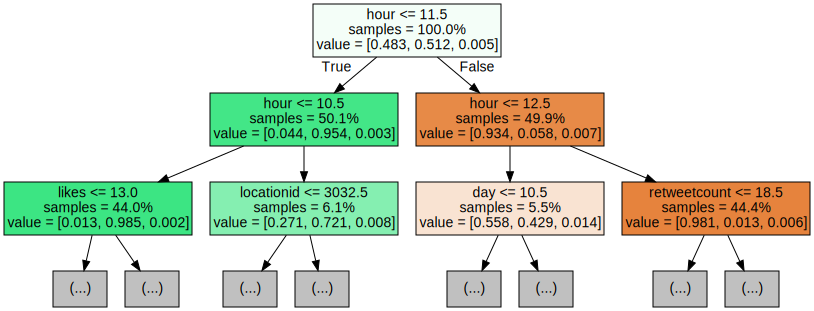

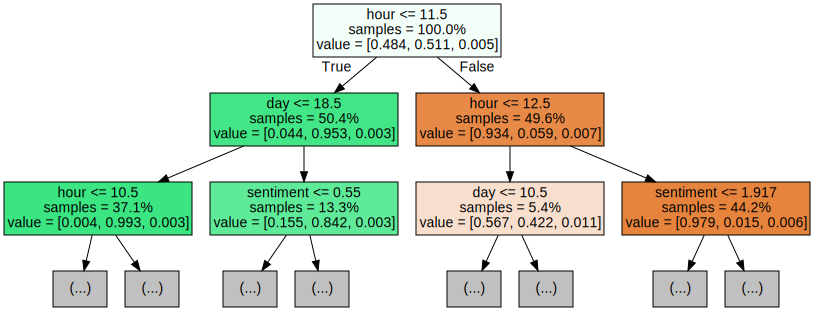

In [95]:
# Initialize a dictionary to store tree frequencies
tree_frequency = Counter()

# Loop through the trees and count their frequency
for i in range(len(rf_classifier.estimators_)):
    tree = rf_classifier.estimators_[i]
    tree_str = export_graphviz(tree, feature_names=train_df_inputs.columns,
                               filled=True, max_depth=2, impurity=False, proportion=True)
    tree_frequency[tree_str] += 1

# Get the three most frequent trees
top_trees = tree_frequency.most_common(3)

# Plot the top three trees
for tree_str, frequency in top_trees:
    graph = graphviz.Source(tree_str)
    display(graph)

Time taken (seconds): 3.3347530364990234
Memory used (MB): 459.23046875
Training Set Accuracy: 1.0
Testing Set Accuracy: 0.9957707121818594

Feature Importances:
        Feature  Importance
0          hour    0.878388
1           day    0.058858
5     sentiment    0.018398
2         reach    0.014317
6    locationid    0.013375
4         likes    0.010636
3  retweetcount    0.006027

Training Set Confusion Matrix:
[[19268     0     0]
 [    0 20271     0]
 [    0     0   181]]

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19268
           1       1.00      1.00      1.00     20271
           2       1.00      1.00      1.00       181

    accuracy                           1.00     39720
   macro avg       1.00      1.00      1.00     39720
weighted avg       1.00      1.00      1.00     39720


Testing Set Confusion Matrix:
[[6339   31    0]
 [  22 6805    0]
 [   0    3   41]]

Testing Set C

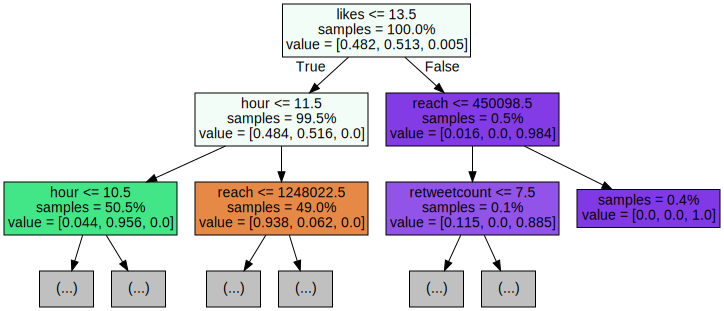

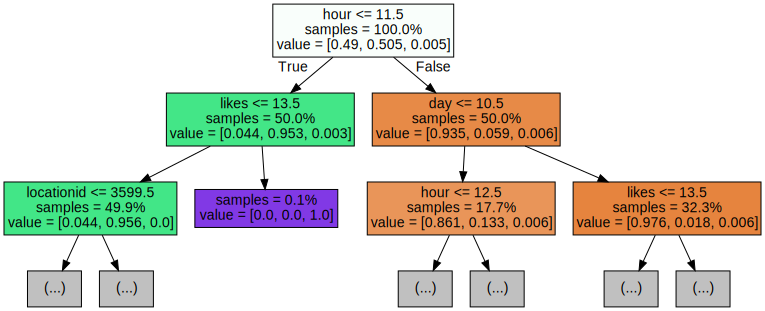

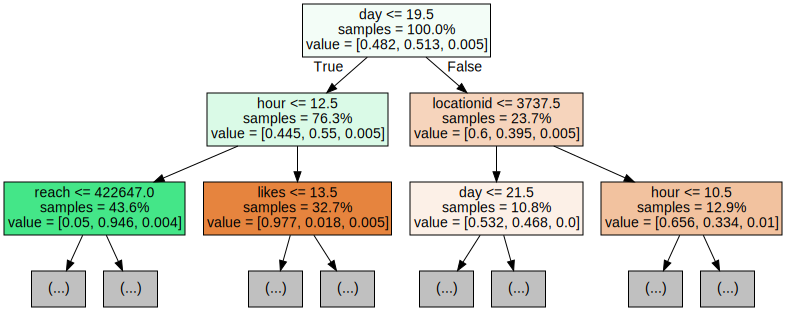

Tree Frequency: 1
|--- likes <= 13.50
|   |--- hour <= 11.50
|   |   |--- hour <= 10.50
|   |   |   |--- reach <= 3355256.50
|   |   |   |   |--- locationid <= 3716.00
|   |   |   |   |   |--- day <= 25.50
|   |   |   |   |   |   |--- sentiment <= -1.83
|   |   |   |   |   |   |   |--- hour <= 9.50
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- hour >  9.50
|   |   |   |   |   |   |   |   |--- day <= 18.50
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- day >  18.50
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- sentiment >  -1.83
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- day >  25.50
|   |   |   |   |   |   |--- hour <= 9.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- hour >  9.50
|   |   |   |   |   |   |   |--- locationid <= 3015.00
|   |   |   |   |   |   |   |   |--- reach <= 74.50
|   |   |   |   |   |   |   |   |   |

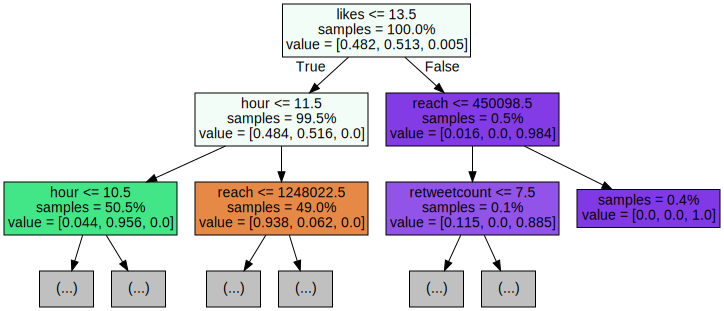

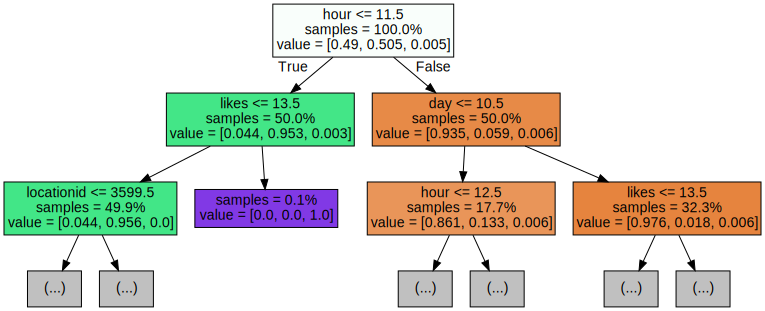

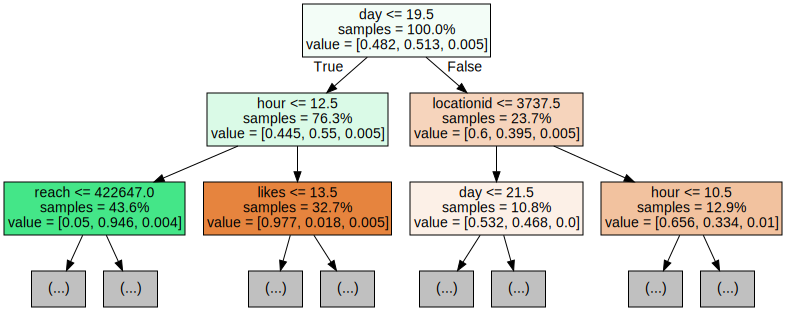

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from wordcloud import WordCloud
from collections import Counter
from scipy import stats
from sklearn.tree import plot_tree, export_graphviz
import graphviz
from IPython.display import display
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
import psutil

# Function to measure memory usage
def memory_usage():
    process = psutil.Process()
    return process.memory_info().rss / 1024 ** 2  # Memory usage in MB

# Start time
start_time = time.time()

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=45011)

# Train the Random Forest classifier
rf_classifier.fit(train_df_inputs, train_df_output['cluster_number'])

# Predictions
y_train_pred_rf = rf_classifier.predict(train_df_inputs)
y_test_pred_rf = rf_classifier.predict(test_df_inputs)

# End time
end_time = time.time()

# Time taken
execution_time = end_time - start_time

# Memory usage
memory_used = memory_usage()

# Accuracy
accuracy_train = accuracy_score(train_df_output['cluster_number'], y_train_pred_rf)
accuracy_test = accuracy_score(test_df_output['cluster_number'], y_test_pred_rf)

# Print time, memory usage, and accuracy
print("Time taken (seconds):", execution_time)
print("Memory used (MB):", memory_used)
print("Training Set Accuracy:", accuracy_train)
print("Testing Set Accuracy:", accuracy_test)

# Print feature importances
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': train_df_inputs.columns, 'Importance': feature_importances})
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(sorted_feature_importance_df)

# Print confusion matrix and classification report for training set
print("\nTraining Set Confusion Matrix:")
print(confusion_matrix(train_df_output['cluster_number'], y_train_pred_rf))
print("\nTraining Set Classification Report:")
print(classification_report(train_df_output['cluster_number'], y_train_pred_rf))

# Print confusion matrix and classification report for testing set
print("\nTesting Set Confusion Matrix:")
print(confusion_matrix(test_df_output['cluster_number'], y_test_pred_rf))
print("\nTesting Set Classification Report:")
print(classification_report(test_df_output['cluster_number'], y_test_pred_rf))

# Export and visualize the first three decision trees
for i in range(3):
    tree = rf_classifier.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=train_df_inputs.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

# Initialize a dictionary to store tree frequencies and rules
tree_frequency = Counter()
tree_rules = {}

# Loop through the trees and count their frequency while storing rules
for i in range(len(rf_classifier.estimators_)):
    tree = rf_classifier.estimators_[i]
    tree_str = export_text(tree, feature_names=list(train_df_inputs.columns))
    tree_frequency[tree_str] += 1
    tree_rules[tree_str] = tree

# Get the three most frequent trees
top_trees = tree_frequency.most_common(3)

# Print the rules for the top three trees
for tree_str, frequency in top_trees:
    print(f"Tree Frequency: {frequency}")
    print(tree_str)
    print("\n")

# Initialize a dictionary to store tree frequencies
tree_frequency = Counter()

# Loop through the trees and count their frequency
for i in range(len(rf_classifier.estimators_)):
    tree = rf_classifier.estimators_[i]
    tree_str = export_graphviz(tree, feature_names=train_df_inputs.columns,
                               filled=True, max_depth=2, impurity=False, proportion=True)
    tree_frequency[tree_str] += 1

# Get the three most frequent trees
top_trees = tree_frequency.most_common(3)

# Plot the top three trees
for tree_str, frequency in top_trees:
    graph = graphviz.Source(tree_str)
    display(graph)


In [97]:
import pandas as pd
import numpy as np
import time
import psutil
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Function to measure memory usage
def memory_usage():
    process = psutil.Process()
    return process.memory_info().rss / 1024 ** 2  # Memory usage in MB

# Data preprocessing and splitting
train_df_inputs, test_df_inputs, train_df_output, test_df_output = train_test_split(df_inputs, df_output, test_size=0.25, random_state=45)

# Initialize lists to store results
models = []
training_times = []
memory_used = []
single_split_accuracies = []
cross_validation_accuracies = []

# Decision Tree
dt_start_time = time.time()
dt_model = DecisionTreeClassifier(criterion='gini', random_state=45011, max_depth=3)
dt_model.fit(train_df_inputs, train_df_output)
dt_training_time = time.time() - dt_start_time
dt_memory_used = memory_usage()
dt_pred = dt_model.predict(test_df_inputs)
dt_accuracy = accuracy_score(test_df_output, dt_pred)

# Cross-validation for Decision Tree
dtc_cv_start_time = time.time()
dtc_cv = DecisionTreeClassifier(criterion='gini', random_state=45011)
cv_scores_dtc = cross_val_score(dtc_cv, df_inputs, df_output.values.ravel(), cv=20)
dtc_cv_time = time.time() - dtc_cv_start_time
dtc_cv_accuracy = np.mean(cv_scores_dtc)

# Append Decision Tree results to lists
models.append('Decision Tree')
training_times.append(dt_training_time)
memory_used.append(dt_memory_used)
single_split_accuracies.append(dt_accuracy)
cross_validation_accuracies.append(dtc_cv_accuracy)

# Random Forest
rf_start_time = time.time()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=45011)
rf_classifier.fit(train_df_inputs, train_df_output['cluster_number'])
rf_training_time = time.time() - rf_start_time
rf_memory_used = memory_usage()
y_train_pred_rf = rf_classifier.predict(train_df_inputs)
y_test_pred_rf = rf_classifier.predict(test_df_inputs)
rf_accuracy_train = accuracy_score(train_df_output['cluster_number'], y_train_pred_rf)
rf_accuracy_test = accuracy_score(test_df_output['cluster_number'], y_test_pred_rf)

# Append Random Forest results to lists
models.append('Random Forest')
training_times.append(rf_training_time)
memory_used.append(rf_memory_used)
single_split_accuracies.append(rf_accuracy_test)  # Using test accuracy as we already calculated it
cross_validation_accuracies.append(np.nan)  # Cross-validation accuracy not calculated here

# Create DataFrame
results_df = pd.DataFrame({
    'Model': models,
    'Training Time (s)': training_times,
    'Memory Used (MB)': memory_used,
    'Single Split Accuracy': single_split_accuracies,
    'Cross Validation Accuracy': cross_validation_accuracies
})

# Print DataFrame
print(results_df)


           Model  Training Time (s)  Memory Used (MB)  Single Split Accuracy  \
0  Decision Tree           0.040424        459.230469               0.975077   
1  Random Forest           3.738085        459.230469               0.995771   

   Cross Validation Accuracy  
0                   0.973603  
1                        NaN  


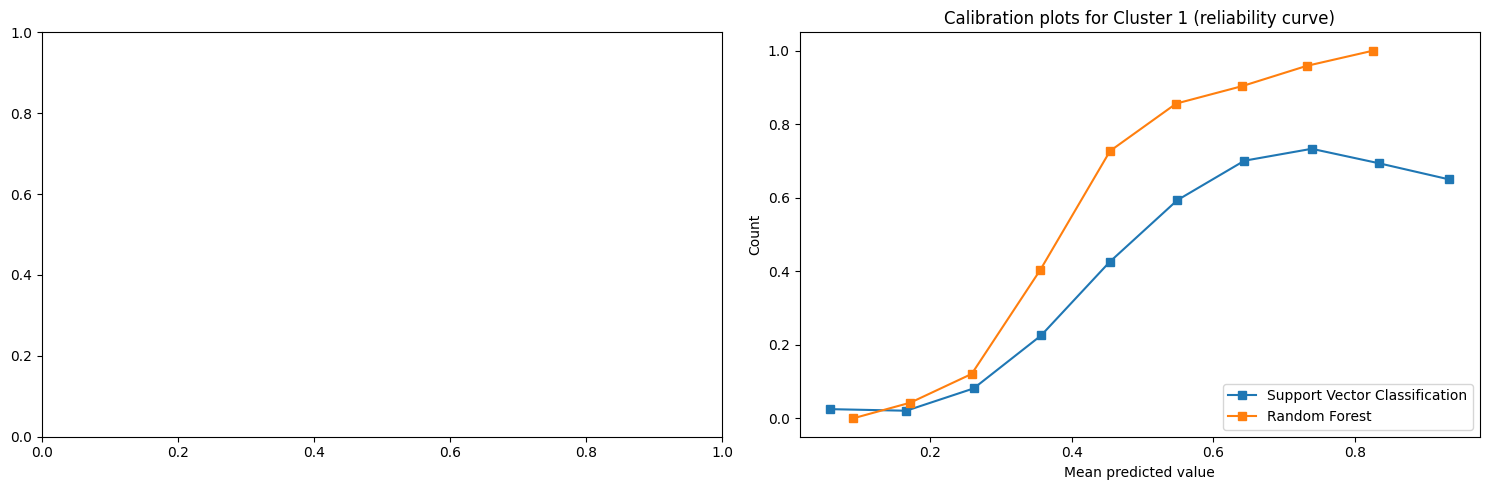

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# Generate some synthetic data
X, y = datasets.make_classification(n_samples=100000, n_features=20,
                                    n_informative=2, n_redundant=2)

train_samples = 100  # Samples used for training the models
X_train = X[:train_samples]
X_test = X[train_samples:]
y_train = y[:train_samples]
y_test = y[train_samples:]

# Define the number of clusters (assuming it's extracted from the dataset)
num_clusters = len(np.unique(df['cluster_number']))

# Create classifiers
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=100)

# Plot calibration plots for cluster 1 with samples
plt.figure(figsize=(15, 5))
cluster_num = 1
plt.subplot(1, 2, cluster_num*2-1)
plt.subplot(1, 2, cluster_num*2)

# Filter data for cluster 1
cluster_indices = df.index[df['cluster_number'] == cluster_num]
X_train_cluster = X_train[np.isin(range(len(X_train)), cluster_indices)]
y_train_cluster = y_train[np.isin(range(len(y_train)), cluster_indices)]
X_test_cluster = X_test[np.isin(range(len(X_test)), cluster_indices)]
y_test_cluster = y_test[np.isin(range(len(y_test)), cluster_indices)]

# Check if the cluster dataset is empty
if len(X_train_cluster) == 0:
    print(f"No samples found for cluster {cluster_num}.")
else:
    # Train classifiers for cluster 1
    for clf, name in [(svc, 'Support Vector Classification'),
                      (rfc, 'Random Forest')]:
        clf.fit(X_train_cluster, y_train_cluster)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test_cluster)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_test_cluster)
            prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        fraction_of_positives, mean_predicted_value = calibration_curve(y_test_cluster, prob_pos, n_bins=10)

        plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % (name, ))

plt.ylabel("Fraction of positives")
plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
plt.title(f'Calibration plots for Cluster {cluster_num} (reliability curve)')

plt.xlabel("Mean predicted value")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
